**My First Project - MNIST Classification**

---



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
data = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
(train_data, train_labels), (test_data, test_labels) = data

In [ ]:
print(type(train_data), train_data.shape, train_data.dtype)
print(type(test_data), test_data.shape, test_data.dtype)
print(type(train_labels), train_labels.shape, train_labels.dtype)
print(type(test_labels), test_labels.shape, test_labels.dtype)

<class 'numpy.ndarray'> (60000, 28, 28) uint8
<class 'numpy.ndarray'> (10000, 28, 28) uint8
<class 'numpy.ndarray'> (60000,) uint8
<class 'numpy.ndarray'> (10000,) uint8


In [ ]:
train_data = train_data.reshape(-1, 28*28)
test_data = test_data.reshape(-1, 28*28)
print(type(train_data), train_data.shape, train_data.dtype)
print(type(test_data), test_data.shape, test_data.dtype)
print(type(train_labels), train_labels.shape, train_labels.dtype)
print(type(test_labels), test_labels.shape, test_labels.dtype)

<class 'numpy.ndarray'> (60000, 784) uint8
<class 'numpy.ndarray'> (10000, 784) uint8
<class 'numpy.ndarray'> (60000,) uint8
<class 'numpy.ndarray'> (10000,) uint8


In [ ]:
print(train_labels[:100])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(type(train_data), train_data.shape, train_data.dtype)
print(type(test_data), test_data.shape, test_data.dtype)
print(type(train_labels), train_labels.shape, train_labels.dtype)
print(type(test_labels), test_labels.shape, test_labels.dtype)

<class 'numpy.ndarray'> (60000, 784) uint8
<class 'numpy.ndarray'> (10000, 784) uint8
<class 'numpy.ndarray'> (60000, 10) float32
<class 'numpy.ndarray'> (10000, 10) float32


In [ ]:
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

In [ ]:
from tensorflow.keras.layers import Input, Dense

In [ ]:
model = tf.keras.Sequential()
model.add(Input(784,))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import SGD, Adam

model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
train_data.shape

(60000, 784)

In [ ]:
model.fit(x=train_data, y=train_labels, batch_size=64, epochs=64, validation_split=0.2)

Epoch 1/64
750/750 [==============================] - 12s 5ms/step - loss: 1.6799 - accuracy: 0.5983 - val_loss: 0.9341 - val_accuracy: 0.8349
Epoch 2/64
750/750 [==============================] - 3s 4ms/step - loss: 0.6518 - accuracy: 0.8609 - val_loss: 0.4491 - val_accuracy: 0.8967
Epoch 3/64
750/750 [==============================] - 3s 4ms/step - loss: 0.4137 - accuracy: 0.8958 - val_loss: 0.3441 - val_accuracy: 0.9132
Epoch 4/64
750/750 [==============================] - 3s 4ms/step - loss: 0.3389 - accuracy: 0.9097 - val_loss: 0.2982 - val_accuracy: 0.9198
Epoch 5/64
750/750 [==============================] - 3s 4ms/step - loss: 0.2989 - accuracy: 0.9181 - val_loss: 0.2698 - val_accuracy: 0.9265
Epoch 6/64
750/750 [==============================] - 3s 4ms/step - loss: 0.2720 - accuracy: 0.9246 - val_loss: 0.2514 - val_accuracy: 0.9302
Epoch 7/64
750/750 [==============================] - 3s 4ms/step - loss: 0.2513 - accuracy: 0.9303 - val_loss: 0.2341 - val_accuracy: 0.9352
Epoch

In [ ]:
model.save('model.h5')

In [ ]:
model.evaluate(x=test_data, y=test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0792 - accuracy: 0.9763


[0.07916200160980225, 0.9763000011444092]

In [ ]:
test_data[:100].shape

(100, 784)

In [ ]:
yyy = model.predict(test_data)


313/313 [==============================] - 1s 2ms/step


In [ ]:
for i in range(len(yyy[100])):
  print(i, yyy[100][i])

0 3.657949e-05
1 0.00018388403
2 2.4808794e-05
3 1.2027593e-06
4 8.680092e-06
5 7.1502254e-05
6 0.99964774
7 4.0281075e-06
8 2.1069995e-05
9 5.302748e-07


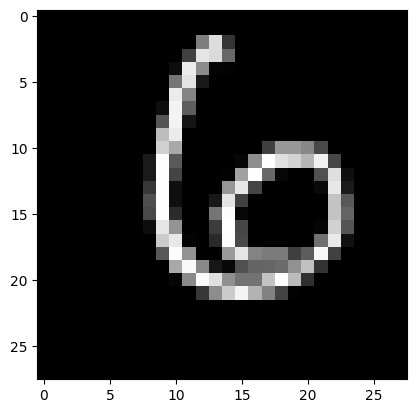

In [ ]:
%matplotlib inline
plt.imshow(test_data[100].reshape(28,28), cmap='gray')